<a href="https://colab.research.google.com/github/nilab02/FinalProjectPython/blob/main/05182022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I found this csv(column seperated values) file in Kaggle about a bank. The files contains customers data, including their age, balance, marital status, job, education, housing status (if they customer already owns a house or not), last contact duration etc. I am going to make a new segmentation of the customers, to determine who are in need to buy a house. I will determine this using their marital status, job, balance and housing status.

In [110]:
#I import libraries for my work
import pandas as pd
from matplotlib import pyplot as plt

#I import my csv file, ndata is the variable name for my csv file
ndata = pd.read_csv('https://raw.githubusercontent.com/nilab02/FinalProjectPython/main/Finalproject.csv')
print(ndata)
# I use ndata.dropna() to drop the NAN rows from the file
nandatadrop = ndata.dropna()
print(nandatadrop)
#I print the head of data using .head
print(ndata.head())
#using .tail I print the tail of data
print(ndata.tail())
# .loc slices the data and gives the selection oppurtunity
ndata.loc[5:200]

cus_marital_sta = ndata.groupby('marital')['marital'].count()
print(cus_marital_sta)
#The results shows Married, Single and divorced for the customers

                                                      id  customer_age  \
0                                               id_43823          28.0   
1                                               id_32289          34.0   
2                                               id_10523          46.0   
3                                               id_43951          34.0   
4                                               id_40992          41.0   
...                                                  ...           ...   
31649                                                NaN           NaN   
31650                                                NaN           NaN   
31651                                                NaN           NaN   
31652                                                NaN           NaN   
31653  HackerEarth HackLive: Customer Segmentation | ...           NaN   

          job_type  marital  education default  balance own_house  \
0       management   single   tertiary    

In [111]:
#So far the married numbers of customers are large, Now need to check for their balance
cus_balance_ch = ndata[ndata['marital']== 'married']['balance']
print(cus_balance_ch)
#Need to total the balance for married people
cus_balance_sum = ndata[ndata['marital']== 'married']['balance'].sum()
#Below Format applied with help of https://blog.teclado.com/python-formatting-numbers-for-printing/
print(f"{cus_balance_sum:,}")
#Need to total the balance for singles
single_balance_sum = ndata[ndata['marital']== 'single']['balance'].sum()
print(f"{single_balance_sum:,}")
#Need to total the balance for divorced
divorced_balance_sum = ndata[ndata['marital']== 'divorced']['balance'].sum()
print(f"{divorced_balance_sum:,}")
"""So far it seems that the married couple could be a potential target for our campaign but before 
jumping into conclusion let's check what segment has the most number of people with owning their own house"""

1         934.0
2         656.0
4        1352.0
5        2880.0
6         495.0
          ...  
31639       2.0
31642     567.0
31643    1072.0
31644     242.0
31645    2699.0
Name: balance, Length: 18945, dtype: float64
26,753,256.0
11,310,459.0
4,472,656.0


"So far it seems that the married couple could be a potential target for our campaign but before \njumping into conclusion let's check what segment has the most number of people with owning their own house"

In [112]:
"""Above we can see that customer who are married have more money in bank,
Here I am going to check for customers who do or don't own a house"""
cus_own = ndata.groupby('own_house')['own_house'].count()
print(cus_own) 

own_house
no     13947
yes    17700
Name: own_house, dtype: int64


#17,700 customer have house and 13,947 customer don't have house in total which can be a good target to convince them buy a house

In [113]:

cus_married_whouse = (ndata[ndata['marital'] =='married']['own_house'] == 'yes').sum()
print("Married Customers with house loan:", cus_married_whouse) # 10,726 out of 18,945 married costumer have house loan

cus_single_whouse = (ndata[ndata['marital'] =='single']['own_house'] == 'yes').sum()
print("Single Customers with house loan:", cus_single_whouse) # 4,816 single customer out of 8857 have house loan

cus_divorced_whouse = (ndata[ndata['marital'] =='divorced']['own_house'] == 'yes').sum()
print("Divorced Customers with house loan:", cus_divorced_whouse) #2,081 single customer out of 3,695 have house loan 3695

Married Customers with house loan: 10726
Single Customers with house loan: 4816
Divorced Customers with house loan: 2081


As the results above we can say that a 8,219 married customers doesn't have house loan, and are also having more money in our bank. It would be great to target them for our campaign and give offer them house loan.
4,041 almost half of our single customers don't have a house loan, they should also be considered for our house loan, and we should market to them. but the divorced customers with no house seems to be very less and shouldn't be given the priority for our ads. 

In [114]:
# Better to show our above data in some charts

#Customer_married_withhouse
cus_married_whouse = (ndata[ndata['marital'] =='married']['own_house'] == 'yes').sum()
print("Married Customers with house loan:", cus_married_whouse)
#Customer_single_withhouse
cus_single_whouse = (ndata[ndata['marital'] =='single']['own_house'] == 'yes').sum()
print("Single Customers with house loan:", cus_single_whouse)
#Customer_divorced_withhouse
cus_divorced_whouse = (ndata[ndata['marital'] =='divorced']['own_house'] == 'yes').sum()
print("Divorced Customers with house loan:", cus_divorced_whouse)

Married Customers with house loan: 10726
Single Customers with house loan: 4816
Divorced Customers with house loan: 2081


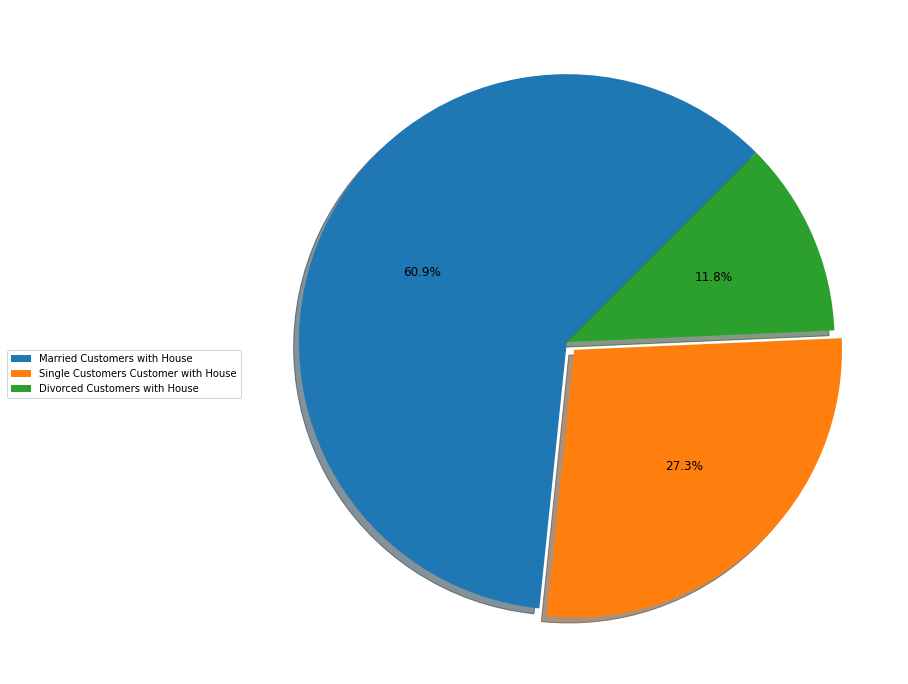

In [115]:
#Pie Chart in maptlotlib
#Now need to bring them all into customer_have_house loan to show it in the pie
cus_have_hl = cus_married_whouse, cus_single_whouse, cus_divorced_whouse
# Creating the labels
label_chh = ('Married Customers with House', 'Single Customers Customer with House', 'Divorced Customers with House')
space2 = (0,0.04,0)
fig1, ax1 = plt.subplots(figsize=(12,16))
ax1.pie( cus_have_hl, autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=45, explode=space2, shadow=True) #data is imported to chart, and further customization done (percentage, and start at angle)
ax1.axis()
plt.legend(loc='upper center', labels=label_chh,
    bbox_to_anchor=(0.0, .5),
    bbox_transform=fig1.transFigure
)
#fig1.set_size_inches(18.5, 10.5) we can change the figure size later using this function

In [116]:
#Customer_married_with no house
cus_married_wnhouse = (ndata[ndata['marital'] =='married']['own_house'] == 'no').sum()
print("Married Customers that don't have house loan:", cus_married_wnhouse)
#Customer_single_with no house
cus_single_wnhouse = (ndata[ndata['marital'] =='single']['own_house'] == 'no').sum()
print("Single Customers that don't have house loan:", cus_single_wnhouse)
#Customer_divorced_with no house
cus_divorced_wnhouse = (ndata[ndata['marital'] =='divorced']['own_house'] == 'no').sum()
print("Divorced Customers that don't have house loan:", cus_divorced_wnhouse)

Married Customers that don't have house loan: 8219
Single Customers that don't have house loan: 4041
Divorced Customers that don't have house loan: 1614


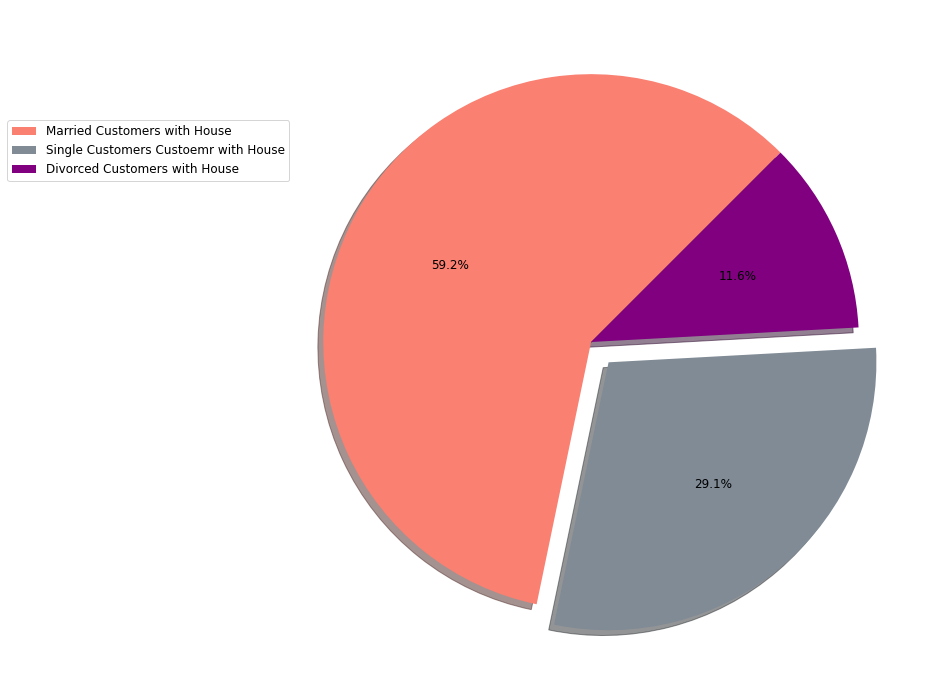

In [117]:
#Pie charting the customers that don't have house loan
#Customer don't have house loan
cus_dhave_hl = cus_married_wnhouse, cus_single_wnhouse, cus_divorced_wnhouse
# Creating the labels
label_chh = ('Married Customers with House', 'Single Customers Custoemr with House', 'Divorced Customers with House')
space1 = (0,0.1,0)
color1 = ("#FA8072", "#808B96", "purple")
fig2, ax2 = plt.subplots(figsize=(12,16))
ax2.pie( cus_dhave_hl, shadow=True, colors=color1,textprops={'fontsize': 12}, autopct='%1.1f%%', explode= space1, startangle=45) #data is imported to chart, and further customization done (percentage, and start at angle)
ax2.axis()
plt.legend(loc='upper center', labels=label_chh,
    prop={'size': 12},
    bbox_to_anchor=(0.0, .7),
    bbox_transform=fig2.transFigure
)
#fig2.set_size_inches(18.5, 10.5) we can change the figure size later using this function

# Now time to create a pie for each of our segments, fig3 (married customer with house and with no house), fig4 (single customer with house and with no house) and fig5 (divorved customer with house and with no house)


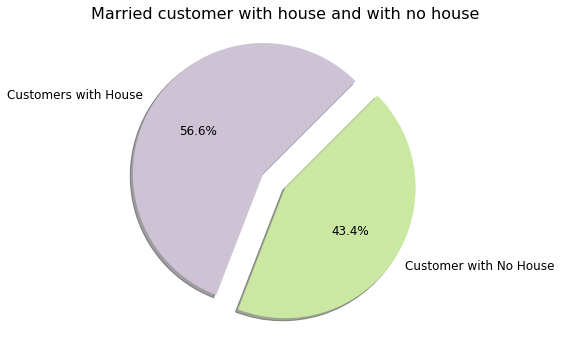

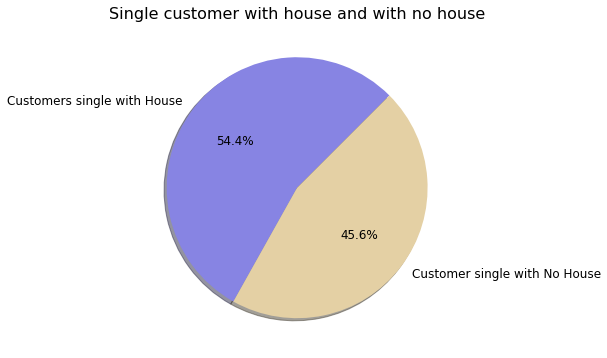

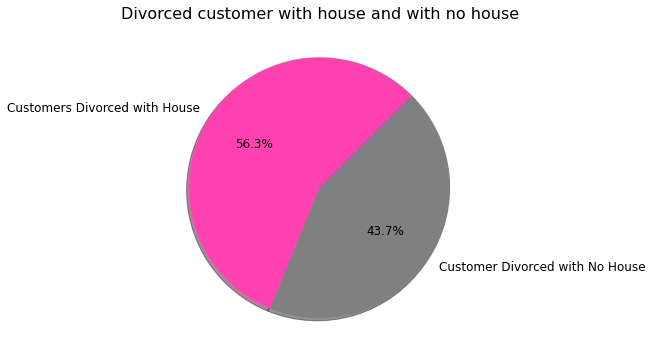

In [118]:
# Married
cus_married_whouse = (ndata[ndata['marital'] =='married']['own_house'] == 'yes').sum()
cus_married_wnhouse = (ndata[ndata['marital'] =='married']['own_house'] == 'no').sum()
cus_married_pie = cus_married_whouse, cus_married_wnhouse
mcustomer = ('Customers with House', 'Customer with No House')
space= (0.2,0)
color2 = ("#CDC3D5", "#CBE8A2")
fig3, ax3 =plt.subplots(figsize=(8,6))
plt.pie(cus_married_pie,autopct='%1.1f%%', colors= color2,textprops={'fontsize': 12}, labels=mcustomer,shadow=True, startangle = 45, explode =space)
plt.title('Married customer with house and with no house', fontsize=16)
plt.show()

# Single
cus_single_whouse = (ndata[ndata['marital'] =='single']['own_house'] == 'yes').sum()
cus_single_wnhouse = (ndata[ndata['marital'] =='single']['own_house'] == 'no').sum()
cus_single_pie = cus_single_whouse, cus_single_wnhouse
mcustomer = ('Customers single with House', 'Customer single with No House')
color3 = ("#8784E3", "#E4D0A4")
fig4, ax4 =plt.subplots(figsize=(8,6))
plt.pie(cus_single_pie, autopct='%1.1f%%', colors= color3,textprops={'fontsize': 12}, shadow=True, labels=mcustomer, startangle = 45)
plt.title('Single customer with house and with no house', fontsize=16)
plt.show()

#Divorced
cus_divorced_whouse = (ndata[ndata['marital'] =='divorced']['own_house'] == 'yes').sum()
cus_divorced_wnhouse = (ndata[ndata['marital'] =='divorced']['own_house'] == 'no').sum()
cus_divorced_pie = cus_divorced_whouse, cus_divorced_wnhouse
mcustomer = ('Customers Divorced with House', 'Customer Divorced with No House')
color4= ("#FF41B1", "gray")
fig5, ax5 =plt.subplots(figsize=(8,6))
plt.pie(cus_divorced_pie, autopct='%1.1f%%', colors=color4, textprops={'fontsize': 12}, labels=mcustomer,shadow=True, startangle = 45)
plt.title('Divorced customer with house and with no house', fontsize=16)
plt.show()

#By seeing the above charts, it seems that even the Divorced customers could be a potential and we can engcourage them to get house loan, but their numbers is not many as compared to the other segments.

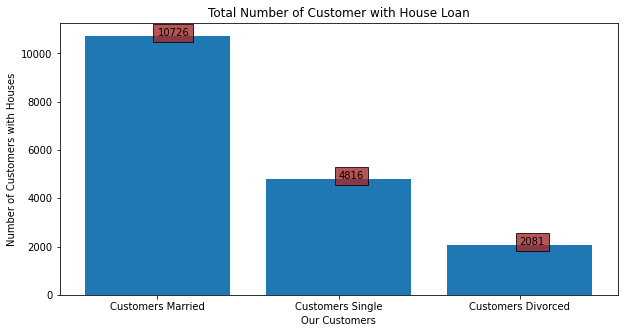

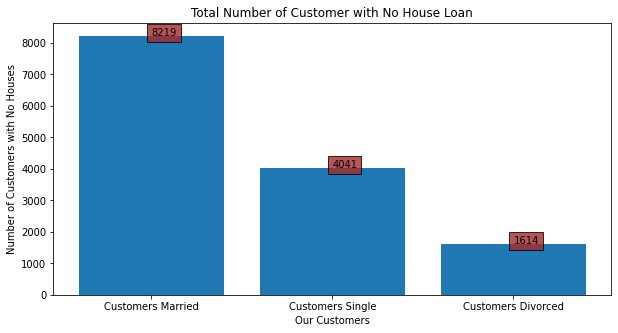

In [119]:
# Bar chart
#Going to put the data in Bar chart
#number of customers with house
num_customerswhouse= cus_married_whouse, cus_single_whouse, cus_divorced_whouse
customer_own_house= ('Customers Married', 'Customers Single', 'Customers Divorced')

#creating a function for the bar labels with the help of https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left',
                 Bbox = dict(facecolor = 'brown', alpha =.8))
if __name__ == '__main__':
    
    # this will be the value labels for our x (customer_own_house) and y (num_customerswhouse)
    x = customer_own_house
    y = num_customerswhouse
      
    # we change the bar chart size here
    plt.figure(figsize = (10,5))
      
    # creating the chart for our data
    plt.bar(x, y)
      
    # calling our function now to make the labels
    addlabels(x, y)
      
    # this creates a title for our chart
    plt.title("Total Number of Customer with House Loan")
      
    # now lets give labels to our x and y
    plt.xlabel("Our Customers")
    plt.ylabel("Number of Customers with Houses")
      
    # visualizing the plot
    plt.show()


# now time for another chart to show the customers with now house
    # this will be the value labels for our x (customer_own_house) and y (num_customerswhouse)
    num_customerswnhouse= cus_married_wnhouse, cus_single_wnhouse, cus_divorced_wnhouse
    our_labels = ('Customers Married', 'Customers Single', 'Customers Divorced')
    
    x1 = our_labels
    y1 = num_customerswnhouse
      
    # we change the bar chart size here
    plt.figure(figsize = (10,5))
      
    # creating the chart for our data
    plt.bar(x1, y1)
      
    # calling our function now to make the labels
    addlabels(x1, y1)
      
    # this creates a title for our chart
    plt.title("Total Number of Customer with No House Loan")
      
    # now lets give labels to our x and y
    plt.xlabel("Our Customers")
    plt.ylabel("Number of Customers with No Houses")
      
    # visualizing the plot
    plt.show()

The customers with House loan: 17370
The customers with no House loan: 13658


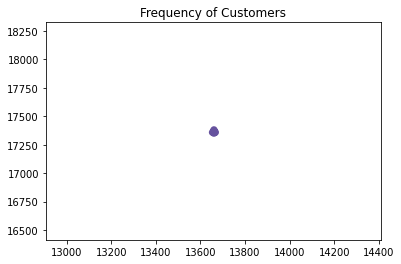

In [248]:
"""Here I am creating a scatter chart to see how many of customers having house and how many doesn't using
a scatter chart"""
customer_yeshouse = ndata[ndata['own_house'] == 'yes']['customer_age'].count()
print("The customers with House loan:", customer_yeshouse)
customer_nohouse = ndata[ndata['own_house'] == 'no']['customer_age'].count()
print("The customers with no House loan:",customer_nohouse)
plt.scatter(customer_nohouse,customer_yeshouse, marker=r'$\clubsuit$', linewidths=5, edgecolors='#66529E')
plt.title('Frequency of Customers')
plt.show()

9881
4121


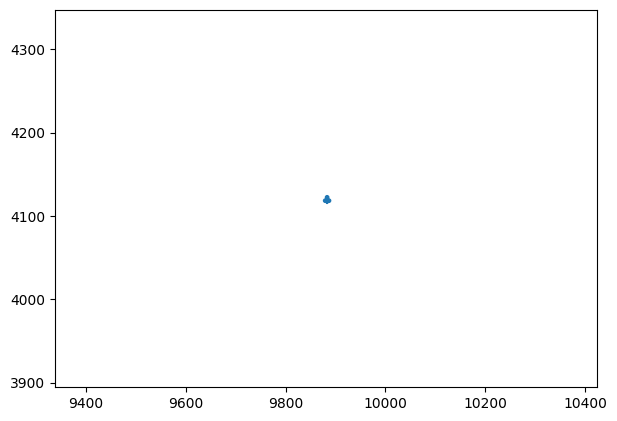

In [338]:
customer_under40 = (ndata[ndata['own_house'] =='no']['customer_age'] <= 50).sum()
customer_over40 = (ndata[ndata['own_house'] =='no']['customer_age'] >= 50).sum()
print(customer_under40)
print(customer_over40)
bin = 5
plt.scatter(customer_under40, customer_over40, marker=r'$\clubsuit$')
plt.show()

[Text(0, 0.5, 'Number of Cus with House Loan'),
 Text(0.5, 0, 'Age of Customers'),
 Text(0.5, 1.0, 'Customers with House Loan')]

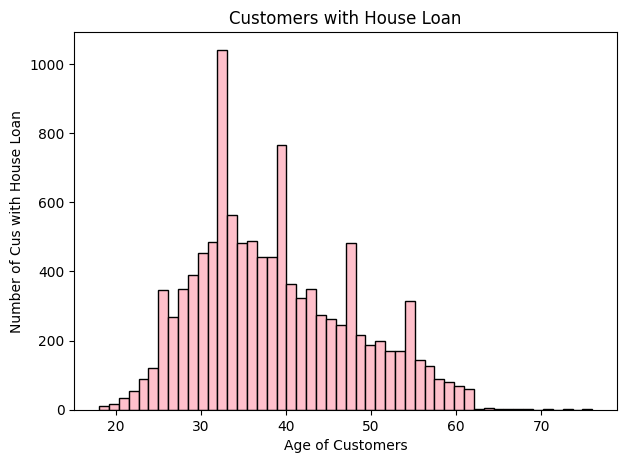

In [348]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
customer_houseyes = ndata[ndata['own_house'] == 'yes']['customer_age'].loc[:20000]

# Plot Histogram on x
plt.hist(customer_houseyes, bins=50, facecolor='pink', edgecolor='black')
plt.gca().set(title='Customers with House Loan', ylabel='Number of Cus with House Loan', xlabel='Age of Customers')

[Text(0, 0.5, 'Number of Cus with No House Loan'),
 Text(0.5, 0, 'Age of Customers'),
 Text(0.5, 1.0, 'Customers with No House Loan')]

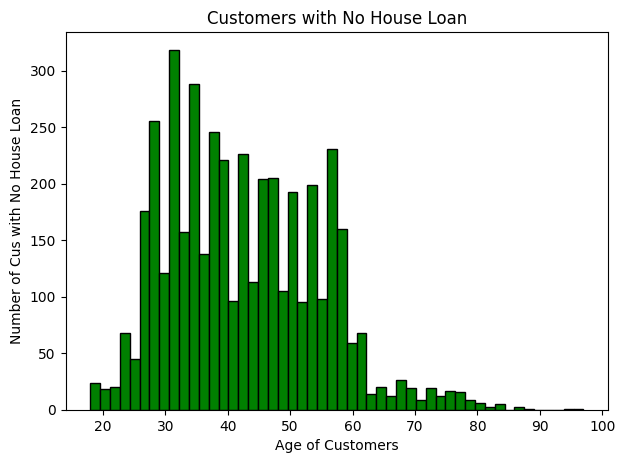

In [357]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
customer_houseno = ndata[ndata['own_house'] == 'no']['customer_age'].loc[:10000]
plt.hist(customer_houseno, bins=50, facecolor='green', edgecolor='black')
plt.gca().set(title='Customers with No House Loan', ylabel='Number of Cus with No House Loan', xlabel='Age of Customers')